In [98]:
from scr_control import load_config, save_config
%run scr_control

## Ejemplo de salvar,  cargar y enviar config

In [78]:
c = np.ones((5,20))*128
save_config(c, '_data/trg_0000.json')

In [79]:
c = load_config('_data/trg_0000.json')

In [80]:
c['values'][0,19]=214

In [69]:
send_config(c,[0])

Sending 192.168.0.11[0, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]


In [123]:
# send_random_config([0])

In [122]:
# send_random_config([0], type_='rgb')

## Ejemplo de config que tiene una lista de configuraciones

In [119]:
c = []
for x in np.arange(42,215,43):
    c.append( np.ones((5,20))*x )

save_config(c, '_data/trg_0001.json', sequence=True)

In [121]:
c = load_config('_data/trg_0001.json')

In [91]:
for i, c_ in enumerate(c):
    send_config(c_,0)

Sending 192.168.0.11[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Sending 192.168.0.12[0, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42]
Sending 192.168.0.13[0, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Sending 192.168.0.14[0, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214]
Sending 192.168.0.15[0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]


## Ejemplo con un config que tiene una lista de configuraciones con el modulo incluido

In [114]:
data = []
for i, x in enumerate(np.arange(42,215,43)):
    data.append({'values': (np.ones((5,20))*x).tolist(), 'type': 'trg', 'module': i} )
dump_json(data, '_data/trg_0002.json')

In [277]:
c = load_config('_data/trg_0002.json')
c

[{'module': 0,
  'type': 'trg',
  'values': array([[42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42.,
          42., 42., 42., 42., 42., 42., 42.],
         [42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42.,
          42., 42., 42., 42., 42., 42., 42.],
         [42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42.,
          42., 42., 42., 42., 42., 42., 42.],
         [42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42.,
          42., 42., 42., 42., 42., 42., 42.],
         [42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42.,
          42., 42., 42., 42., 42., 42., 42.]])},
 {'module': 1,
  'type': 'trg',
  'values': array([[85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85.,
          85., 85., 85., 85., 85., 85., 85.],
         [85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85.,
          85., 85., 85., 85., 85., 85., 85.],
         [85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 8

In [116]:
send_config_sequence(c)

Sending 192.168.0.11[0, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42]
Sending 192.168.0.12[0, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85]
Sending 192.168.0.13[0, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Sending 192.168.0.14[0, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171]
Sending 192.168.0.15[0, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214]


In [263]:
w = 0.25
d = 0.05
s = 1.2
ucoord_base = [(-w-d,w+d),(-w-d,-w-d),(w+d,-w-d),(w+d,w+d),(w-d,w+d),(w-d,-w+d),(-w+d,-w+d),(-w+d,w+d)]
def ucoord(i,j):
    return [(c[0]+j*s,c[1]+i*s) for c in ucoord_base ]

In [264]:
from itertools import product
ij = list(product(range(4),range(5)))

In [284]:
trg_values.flatten()[20]

42.0

In [296]:
%matplotlib inline

import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
import matplotlib as mpl

n_modules = 5

def plot_scr(trg_values, n_modules=5):
    
    fig, ax = plt.subplots(figsize=(32,8))

    u_idx=-1
    for k in range(n_modules):
        polygons =  []
        for i,j in ij:
            u_idx+=1
            p = Polygon(ucoord(0,0) , True)
            r = mpl.transforms.Affine2D().rotate(byte_to_angle(trg_values[u_idx]))
            t = mpl.transforms.Affine2D().translate(j+k*6, i)
            tra = r +t 
            p.set_transform(tra)
            polygons.append(p)
        patch = PatchCollection(polygons)
        patch.set_color([0, 0, 0])
        ax.add_collection(patch)
    plt.axis('off');
    plt.ylim(-1,4)
    plt.xlim(-1, 29 )
    plt.gca().set_aspect('equal', 'box')


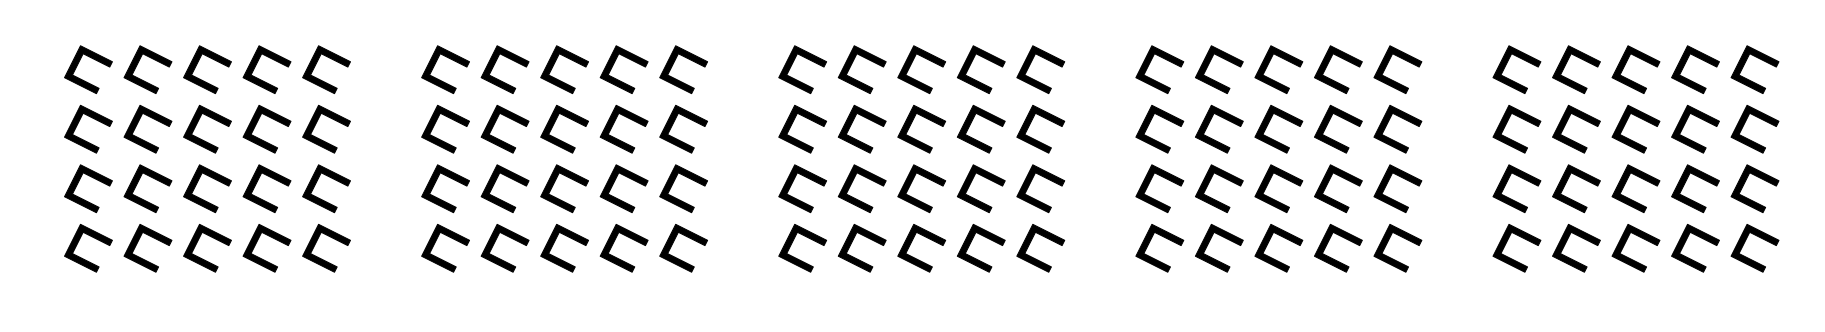

In [297]:
trg_values = c[0]['values'].flatten()
plot_scr(trg_values)